In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
blue = '#88f'
orange = '#fa6'
purple = '#d8c'
gold = '#fe6'
silver = '#997'
bronze = '#c63'

In [3]:
df = pd.read_csv('score.csv')
cols = [f'trloss{i}' for i in range(4)]
df['tr_mean'] = df[cols].mean(axis=1)
df['tr_std'] = df[cols].std(axis=1)
cols = [f'loss{i}' for i in range(4)]
df['cv_mean'] = df[cols].mean(axis=1)
df['cv_std'] = df[cols].std(axis=1)
df_ = df.fillna('')
df_ = df_.set_index(df_['model']+'::'+df_['impl_from']+'::'+df_['version'])
df.index = '──' + df_.index
lb = df[df['model'].str.startswith('LB')].copy()
df = df[~df['model'].str.startswith('LB')].copy()
df_

,model,impl_from,version,loss0,loss1,loss2,loss3,loss4,trloss0,trloss1,trloss2,trloss3,trloss4,lbscore,tr_mean,tr_std,cv_mean,cv_std
LB 1st place::::benchmark,LB 1st place,,benchmark,,,,,,,,,,,0.01805,,,,
LB Gold::::benchmark,LB Gold,,benchmark,,,,,,,,,,,0.01827,,,,
LB Silver::::benchmark,LB Silver,,benchmark,,,,,,,,,,,0.01837,,,,
LB Bronze::::benchmark,LB Bronze,,benchmark,,,,,,,,,,,0.01842,,,,
mlp::::baseline,mlp,,baseline,0.02469,0.02521,0.02455,0.02428,,0.02051,0.02094,0.02045,0.02029,,,0.0205475,0.000277654,0.0246825,0.000390672
mlp::::output bias,mlp,,output bias,0.01654,0.01624,0.0164,0.01613,0.01659,0.015,0.01507,0.01419,0.01405,0.01498,0.02001,0.0145775,0.000532126,0.0163275,0.000179884
lgbm::::baseline,lgbm,,baseline,0.018077,0.018033,0.018248,0.018205,,,,,,,,,,0.0181408,0.000102151
lgbm::::selective features,lgbm,,selective features,0.017967,,,,,0.0073371,,,,,,0.0073371,,0.017967,
lgbm::::pca feats only,lgbm,,pca feats only,0.018204,0.018229,0.018422,0.018384,,,,,,,,,,0.0183097,0.000109265
lgbm::pca feats only::diff,lgbm,pca feats only,diff,0.018174,0.018151,0.018439,0.018347,,,,,,,,,,0.0182777,0.000138596


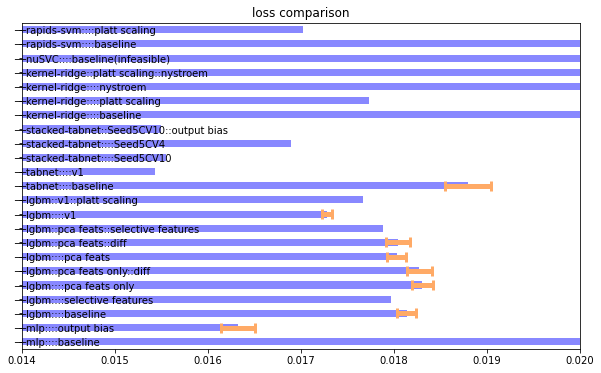

In [4]:
fig, ax = plt.subplots()
plt.sca(ax)
plt.yticks(ha='left')

p = df['cv_mean'].astype(np.float64).plot(kind='barh', xerr=df['cv_std'], 
                                       title='loss comparison', color=blue, 
                                       error_kw={'ecolor': orange, 'elinewidth':5, 
                                                 'capsize':5, 'capthick': 3},
                                       figsize=(10,6), ax=ax)
p.set_xlim(.014, .020)
p.get_figure().savefig('score.png', bbox_inches='tight', dpi=400)

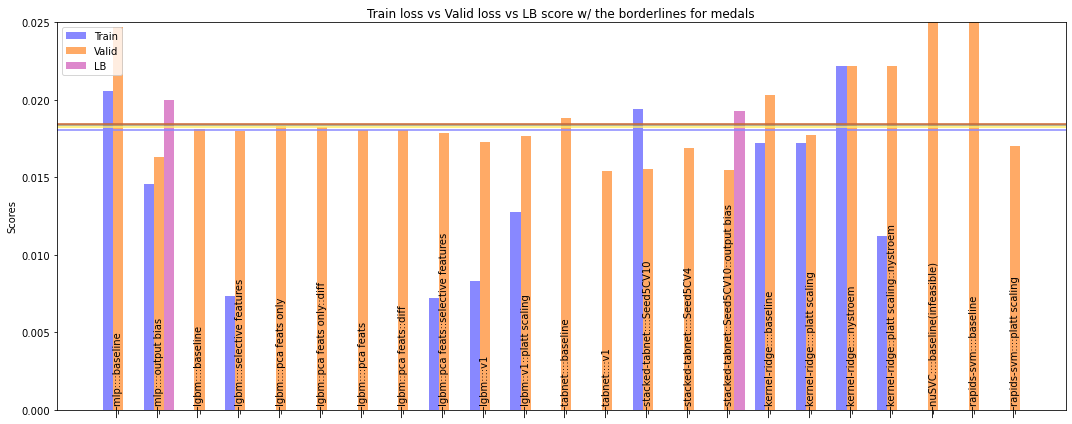

In [5]:
labels = df.index
train_loss = df['tr_mean']
valid_loss = df['cv_mean']
lb_loss = df['lbscore']

x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots(figsize=(15,6))
plt.sca(ax)
plt.xticks(va='bottom',)

rects1 = ax.bar(x - width, train_loss, width, label='Train', color=blue)
rects2 = ax.bar(x          , valid_loss, width, label='Valid', color=orange)
rects3 = ax.bar(x + width,    lb_loss, width, label='LB   ', color=purple)

ax.set_ylabel('Scores')
ax.set_title('Train loss vs Valid loss vs LB score w/ the borderlines for medals')
ax.set_ylim(0, .025)
ax.axhline(y=lb['lbscore'].iloc[0], color=blue)
ax.axhline(y=lb['lbscore'].iloc[1], color=gold)
ax.axhline(y=lb['lbscore'].iloc[2], color=silver)
ax.axhline(y=lb['lbscore'].iloc[3], color=bronze)
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=90)
ax.legend()
fig.tight_layout()
plt.savefig('score_tr_cv.png', bbox_inches='tight', dpi=400)